In [ ]:
# link to repo: https://github.com/nathanielcapistrano/aug22hw1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("prices.csv")

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Brand_Name,Ticker,Industry_Tag,Country,Dividends,Stock Splits,Capital Gains
0,2025-07-03 00:00:00-04:00,6.630000,6.740000,6.615000,6.640000,4209664.0,peloton,PTON,fitness,usa,0.0,0.0,NaN
1,2025-07-03 00:00:00-04:00,106.750000,108.370003,106.330101,107.339996,560190.0,crocs,CROX,footwear,usa,0.0,0.0,NaN
2,2025-07-03 00:00:00-04:00,122.629997,123.050003,121.550003,121.930000,36600.0,adidas,ADDYY,apparel,germany,0.0,0.0,NaN
3,2025-07-03 00:00:00-04:00,221.705002,224.009995,221.360001,223.410004,29295154.0,amazon,AMZN,e-commerce,usa,0.0,0.0,NaN
4,2025-07-03 00:00:00-04:00,212.145004,214.649994,211.810104,213.550003,34697317.0,apple,AAPL,technology,usa,0.0,0.0,NaN


In [7]:
df['Date'] = pd.to_datetime(df['Date'],utc=True)

In [8]:
df1 = df[
    (df['Country'].str.lower() == 'usa') &
    (df['Ticker'].str.upper() == 'NVDA') &
    (df['Date'].dt.year.between(2000, 2005))
].copy()

In [11]:
df1.head()

,Date,Open,High,Low,Close,Volume,Brand_Name,Ticker,Industry_Tag,Country,Dividends,Stock Splits,Capital Gains
257219,2005-12-30 05:00:00+00:00,2.833316,2.834082,2.783623,2.795091,22960800.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN
257259,2005-12-29 05:00:00+00:00,2.912826,2.922001,2.837139,2.849371,31046400.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN
257313,2005-12-28 05:00:00+00:00,2.887597,2.923530,2.869249,2.914356,26442000.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN
257349,2005-12-27 05:00:00+00:00,2.866956,2.918944,2.857782,2.887598,36796800.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN
257392,2005-12-23 05:00:00+00:00,2.855488,2.873836,2.836375,2.870013,21453600.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN


In [14]:
df1 = df1.sort_values('Date')
df1.head()

,Date,Open,High,Low,Close,Volume,Brand_Name,Ticker,Industry_Tag,Country,Dividends,Stock Splits,Capital Gains
310101,2000-01-03 05:00:00+00:00,0.903091,0.910259,0.843363,0.894729,30091200.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN
310071,2000-01-04 05:00:00+00:00,0.879199,0.881589,0.826639,0.870838,30048000.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN
310053,2000-01-05 05:00:00+00:00,0.845752,0.860087,0.830223,0.842169,18835200.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN
309997,2000-01-06 05:00:00+00:00,0.842168,0.842168,0.754965,0.787218,12048000.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN
309967,2000-01-07 05:00:00+00:00,0.783635,0.808720,0.771689,0.800359,7118400.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN


In [ ]:
## making the other independent variables

In [15]:
df1['Volume_Change'] = df1['Volume'].diff()
df1['Lagged_Volume'] = df1['Volume'].shift(1)
df1['Lagged_Volume_Change'] = df1['Volume_Change'].shift(1)

In [16]:
df1.head()

,Date,Open,High,Low,Close,Volume,Brand_Name,Ticker,Industry_Tag,Country,Dividends,Stock Splits,Capital Gains,Volume_Change,Lagged_Volume,Lagged_Volume_Change
310101,2000-01-03 05:00:00+00:00,0.903091,0.910259,0.843363,0.894729,30091200.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,NaN,NaN,NaN
310071,2000-01-04 05:00:00+00:00,0.879199,0.881589,0.826639,0.870838,30048000.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,-43200.0,30091200.0,NaN
310053,2000-01-05 05:00:00+00:00,0.845752,0.860087,0.830223,0.842169,18835200.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,-11212800.0,30048000.0,-43200.0
309997,2000-01-06 05:00:00+00:00,0.842168,0.842168,0.754965,0.787218,12048000.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,-6787200.0,18835200.0,-11212800.0
309967,2000-01-07 05:00:00+00:00,0.783635,0.808720,0.771689,0.800359,7118400.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,-4929600.0,12048000.0,-6787200.0


In [41]:
#another method where the independent variables are calculated prior to filtering out the 00-05 data
#reason: to get rid of the NaN

In [22]:
df2 = df[
    (df['Country'].str.lower() == 'usa') &
    (df['Ticker'].str.upper() == 'NVDA')
].copy()

In [23]:
df2.head()

,Date,Open,High,Low,Close,Volume,Brand_Name,Ticker,Industry_Tag,Country,Dividends,Stock Splits,Capital Gains
18,2025-07-03 04:00:00+00:00,158.350006,160.979996,157.770004,159.339996,142313659.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN
106,2025-07-03 04:00:00+00:00,158.369995,160.979996,157.770004,159.339996,143716100.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN
129,2025-07-02 04:00:00+00:00,152.979996,157.600006,152.970001,157.250000,170894500.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN
224,2025-07-01 04:00:00+00:00,156.289993,157.199997,151.490005,153.300003,212674300.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN
241,2025-06-30 04:00:00+00:00,158.399994,158.660004,155.960007,157.990005,194187600.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN


In [24]:
df2['Volume_Change'] = df2['Volume'].diff()
df2['Lagged_Volume'] = df2['Volume'].shift(1)
df2['Lagged_Volume_Change'] = df2['Volume_Change'].shift(1)

In [27]:
df2.head()

,Date,Open,High,Low,Close,Volume,Brand_Name,Ticker,Industry_Tag,Country,Dividends,Stock Splits,Capital Gains,Volume_Change,Lagged_Volume,Lagged_Volume_Change
18,2025-07-03 04:00:00+00:00,158.350006,160.979996,157.770004,159.339996,142313659.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,NaN,NaN,NaN
106,2025-07-03 04:00:00+00:00,158.369995,160.979996,157.770004,159.339996,143716100.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,1402441.0,142313659.0,NaN
129,2025-07-02 04:00:00+00:00,152.979996,157.600006,152.970001,157.250000,170894500.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,27178400.0,143716100.0,1402441.0
224,2025-07-01 04:00:00+00:00,156.289993,157.199997,151.490005,153.300003,212674300.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,41779800.0,170894500.0,27178400.0
241,2025-06-30 04:00:00+00:00,158.399994,158.660004,155.960007,157.990005,194187600.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,-18486700.0,212674300.0,41779800.0


In [33]:
df3 = df2[
df2['Date'].dt.year.between(2000, 2005)
].copy()
df3=df3.sort_values('Date')

In [34]:
df3.head()

,Date,Open,High,Low,Close,Volume,Brand_Name,Ticker,Industry_Tag,Country,Dividends,Stock Splits,Capital Gains,Volume_Change,Lagged_Volume,Lagged_Volume_Change
310101,2000-01-03 05:00:00+00:00,0.903091,0.910259,0.843363,0.894729,30091200.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,43200.0,30048000.0,11212800.0
310071,2000-01-04 05:00:00+00:00,0.879199,0.881589,0.826639,0.870838,30048000.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,11212800.0,18835200.0,6787200.0
310053,2000-01-05 05:00:00+00:00,0.845752,0.860087,0.830223,0.842169,18835200.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,6787200.0,12048000.0,4929600.0
309997,2000-01-06 05:00:00+00:00,0.842168,0.842168,0.754965,0.787218,12048000.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,4929600.0,7118400.0,-16867200.0
309967,2000-01-07 05:00:00+00:00,0.783635,0.808720,0.771689,0.800359,7118400.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,-16867200.0,23985600.0,9172800.0


In [ ]:
# we now keep only the features similar to that of the paper

In [35]:
features = df3[['Date', 'Volume', 'Volume_Change', 
                    'Lagged_Volume', 'Lagged_Volume_Change']].dropna()

In [39]:
#features.head()
features.tail()

,Date,Volume,Volume_Change,Lagged_Volume,Lagged_Volume_Change
257392,2005-12-23 05:00:00+00:00,21453600.0,-15343200.0,36796800.0,10354800.0
257349,2005-12-27 05:00:00+00:00,36796800.0,10354800.0,26442000.0,-4604400.0
257313,2005-12-28 05:00:00+00:00,26442000.0,-4604400.0,31046400.0,8085600.0
257259,2005-12-29 05:00:00+00:00,31046400.0,8085600.0,22960800.0,-24320400.0
257219,2005-12-30 05:00:00+00:00,22960800.0,-24320400.0,47281200.0,-3726000.0


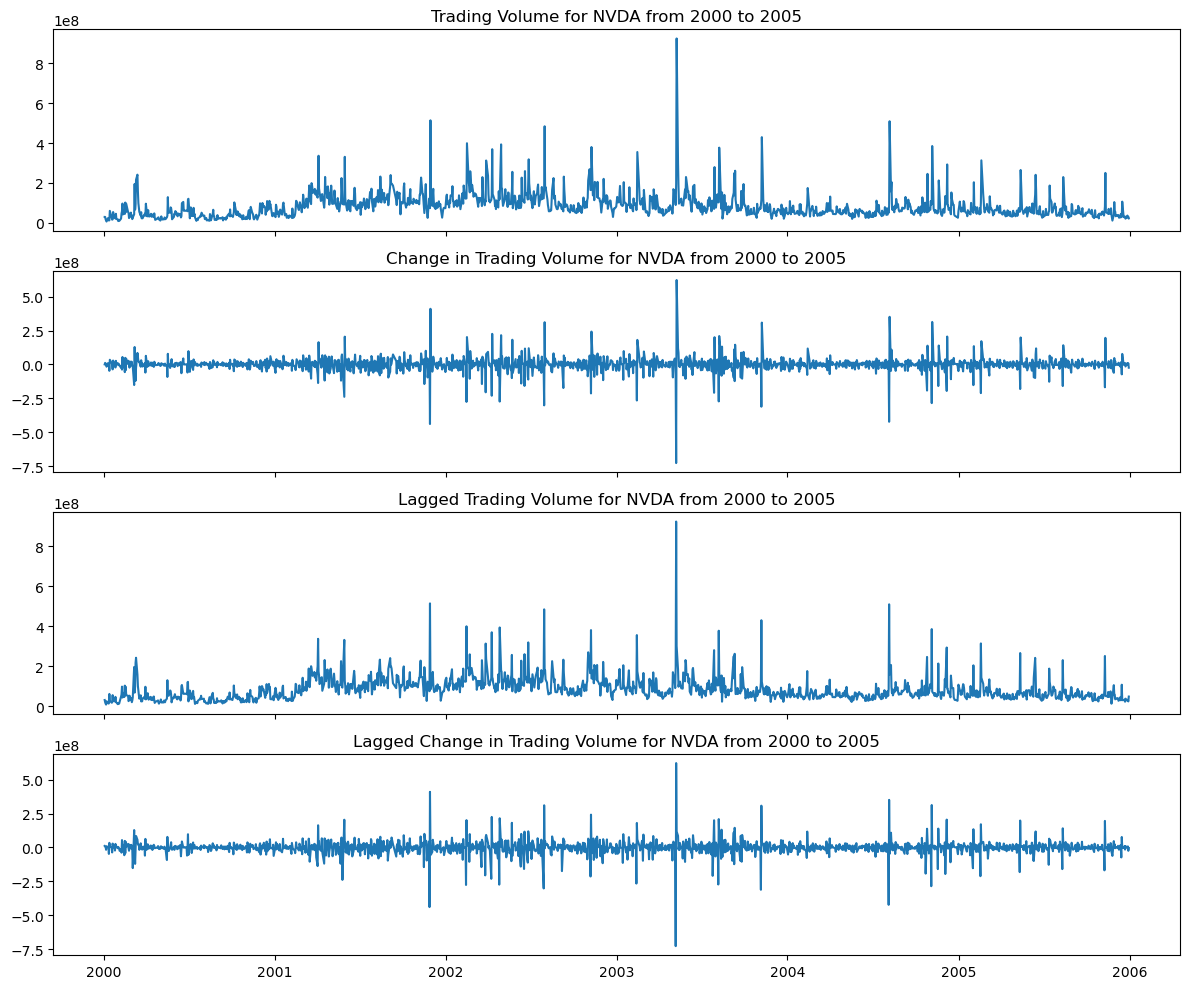

In [40]:
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

axes[0].plot(features['Date'], features['Volume'])
axes[0].set_title("Trading Volume for NVDA from 2000 to 2005")

axes[1].plot(features['Date'], features['Volume_Change'])
axes[1].set_title("Change in Trading Volume for NVDA from 2000 to 2005")

axes[2].plot(features['Date'], features['Lagged_Volume'])
axes[2].set_title("Lagged Trading Volume for NVDA from 2000 to 2005")

axes[3].plot(features['Date'], features['Lagged_Volume_Change'])
axes[3].set_title("Lagged Change in Trading Volume for NVDA from 2000 to 2005")

plt.tight_layout()
plt.show()